# Learning From Data HW5

https://work.caltech.edu/homework/hw5.pdf

# Linear Regression Error

Noisy target $y = \mathbf w^{*T} \mathbf x + \epsilon$

$ \mathbf x \in \mathbb R^d $ (including $x_0 = 1$)

$ \epsilon $ independent of everything, with mean zero and variance $\sigma^2$.

$ N $ samples in training data set $ \mathcal D $.

Output of linear regression is parameter vector $\mathbf w_{lin}$

Expected in-sample error with respect to $\mathcal D$ is then given by

$$ \mathbb E_{\mathcal D}[E_{in}(\mathbf w_{lin})] = \sigma^2 \left( 1 - \frac{d+1}{N} \right) $$

# 1 

For $\sigma=0.1$ and $d=8$ what $N$ that will result in an expected $E_{in}$ greater than 0.008?

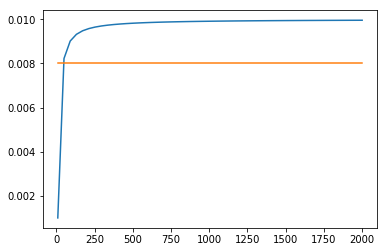

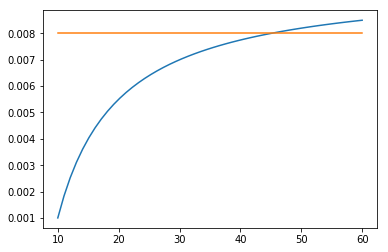

In [5]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 0.1
d = 8

def expected_in_sample_error(N):
    return sigma**2 * (1 - (d+1)/N)

NN = np.linspace(10, 2000)
plt.plot(NN, expected_in_sample_error(NN))
plt.plot([10, 2000], [0.008, 0.008])
plt.show()

NN = np.linspace(10, 60)
plt.plot(NN, expected_in_sample_error(NN))
plt.plot([10, 60], [0.008, 0.008])
plt.show()

We see that in-sample error increases greatly for the N < 100, then falttens out.
At N=50 it is just above the threshold of 0.008.

The best matching alternative is **Alternative C: 100**.

# Nonlinear Transforms

# 2

$$ \Phi(1, x_1, x_2) = (1, x_1^2, x_2^2) $$

Which alternative represents the hyperbolic decision boundary in the $\mathcal Z$ space?

---

$$ \tilde w_0 + \tilde w_1 x_1^2 + \tilde w_2 x_2^2 = 0$$

* Small x1 --> Positive
* Large x1 --> Negative
* Small x2 --> Negative, positive, negative
* Large x2 --> Positive

Since y=x and y=-x lines are constant, we know that $\tilde w_1 \approx - \tilde w_2$.

Since origin is positive, we know that $\tilde w_0$ is positive.

Since large $x_1$ is negative, we know that $\tilde w_1$ is negative.

Thus $\tilde w_1 < 0$ and $\tilde w_2 > 0$.

**Alternative D**

# 3

Consider $\Phi_4$ (15 outputs), two inputs ( $\mathbf x \in \mathbb R^2 $)

Originally $d_{VC} = d+1 = 3$ (2D perceptron)

But after transformation we have that $d_{VC} = \tilde d +1 $ where $\tilde d+1 = 15$ (number of outputs of $\Phi$)

**Alternative C: 15** is equal to the VC dimension and is the first value that is NOT SMALLER than the VC dimension.

# Gradient Descent

# 4, 5, 6

Apply the chain rule to get alternative  E.

How many iterations does it take for the error to fall below 1e-14 for the first time? Starting at (u,v)=(1,1)

Final coordinate: [0.04473629 0.02395871]
Final err: 1.2086833944220747e-15
Iterations: 10


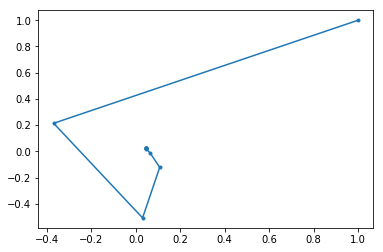

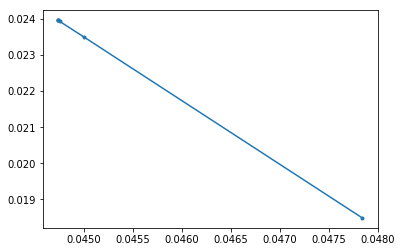

In [10]:
import numpy as np

def E(x):
    u = x[0]
    v = x[1]
    return (u*np.exp(v) - 2*v*np.exp(-u))**2

def gradE(x):
    u = x[0]
    v = x[1]
    return np.array([
        2*(u*np.exp(v) - 2*v*np.exp(-u))*(np.exp(v) + 2*v*np.exp(-u)),
        2*(u*np.exp(v) - 2*v*np.exp(-u))*(u*np.exp(v) - 2*np.exp(-u))
    ])

def gradient_descent(E, gradE, x0, tol=1e-14, eta=0.1):
    x = x0.copy()
    its = 0
    err = E(x)
    us = [x[0]]
    vs = [x[1]]
    while err > tol:
        grad = gradE(x)
        x = x - eta*grad
        us.append(x[0])
        vs.append(x[1])
        err = E(x)
        its += 1
        if its > 100:
            print("Didn't converge")
            return
    return (x, err, its, us, vs)
    
    
x0 = np.array([1, 1])

final_uv, err, its, us, vs = gradient_descent(E, gradE, x0)
print("Final coordinate:", final_uv)
print("Final err:", err)
print("Iterations:", its)
plt.plot(us, vs, ".-")
plt.show()
plt.plot(us[5:], vs[5:], ".-")
plt.show()

us_grad = us
vs_grad = vs

**5: Alternative D, 10 iterations**

**6: Alternative E, (0.045, 0.024)**

# 7: "Coordinate descent"

Stepping along only one axis at a time.

Final coordinate: 6.29707589930517 -2.852306954077811
Final err: 0.13981379199615315
Iterations: 15


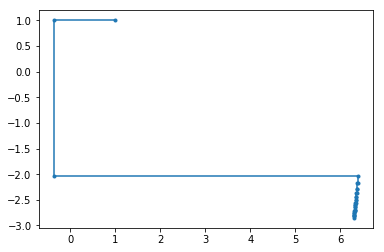

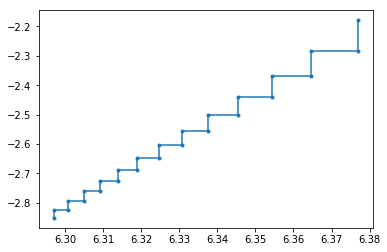

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def E(u, v):
    return (u*np.exp(v) - 2*v*np.exp(-u))**2

def dEdu(u, v):
    return 2*(u*np.exp(v) - 2*v*np.exp(-u))*(np.exp(v) + 2*v*np.exp(-u))

def dEdv(u, v):
    return 2*(u*np.exp(v) - 2*v*np.exp(-u))*(u*np.exp(v) - 2*np.exp(-u))

def coordinate_descent(E, dEdu, dEdv, u0, v0, tol=1e-14, eta=0.1):
    u, v = u0, v0
    us = [u]
    vs = [v]
    for it in range(15):
        u = u - eta*dEdu(u, v)
        us.append(u)
        vs.append(v)
        v = v - eta*dEdv(u, v)
        us.append(u)
        vs.append(v)
    return u, v, E(u, v), 15, us, vs

final_u, final_v, err, its, us, vs = coordinate_descent(E, dEdu, dEdv, 1.0, 1.0)
print("Final coordinate:", final_u, final_v)
print("Final err:", err)
print("Iterations:", its)
plt.plot(us, vs, ".-")
plt.show()
plt.plot(us[5:], vs[5:], ".-")
plt.show()

us_coord = us
vs_coord = vs

Looks like the coordinate descent gets stuck in a local minimum, and end up with an error close to $10^{-1}$. **Alternative A**

Let's have a look at the error function.

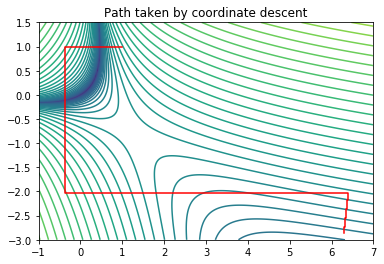

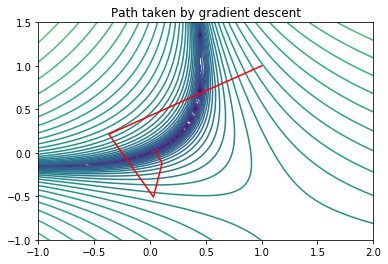

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline


def E(u, v):
    return (u*np.exp(v) - 2*v*np.exp(-u))**2

xx = np.linspace(-1, 7, 200)
yy = np.linspace(-3, 1.5, 200)
XX, YY = np.meshgrid(xx, yy)
ZZ = np.log(E(XX, YY))

plt.title("Path taken by coordinate descent")
plt.contour(XX, YY, ZZ, np.linspace(-10, 10))
plt.plot(us_coord, vs_coord, 5, "b.-", color="red")
plt.ylim(-3, 1.5)
plt.xlim(-1, 7)
plt.show()


plt.title("Path taken by gradient descent")
plt.contour(XX, YY, ZZ, np.linspace(-10, 10))
plt.plot(us_grad, vs_grad, 5, "b.-", color="red")
plt.ylim(-1, 1.5)
plt.xlim(-1, 2)
plt.show()

As suspected, the coordinate descent just flies out of the local minimum.

# Logistic Regression

First, write methods to generate datasets.

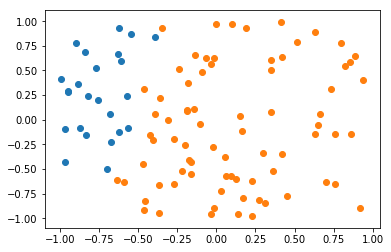

In [142]:
def random_point():
    return 2*np.random.rand()-1, 2*np.random.rand()-1

def random_line():
    x0, y0 = random_point()
    x1, y1 = random_point()
    a = (y1 - y0)/(x1 - x0)
    b = y1 - a*x1
    return b, a

def generate_dataset(N, b, a):
    X = 2*np.random.rand(N, 3)-1
    X[:,0] = 1
    y = np.sign(b + a*X[:,1] - X[:,2])
    return X, y

b, a = random_line()
X, y = generate_dataset(100, b, a)
ibelow = np.where(y==-1)
iabove = np.where(y==1)


plt.scatter(X[ibelow,1], X[ibelow,2])
plt.scatter(X[iabove,1], X[iabove,2])
plt.show()

Epochs:  355.0
Error:  0.1028882904940896
Epochs:  358.0
Error:  0.0952438705065887
Epochs:  356.3333333333333
Error:  0.09449563981676956
Epochs:  348.75
Error:  0.09692997060983294
Epochs:  360.6
Error:  0.09736222208052302
Epochs:  363.0
Error:  0.09900832851076297
Epochs:  358.7142857142857
Error:  0.09804516967855025
Epochs:  355.125
Error:  0.09930165650571632
Epochs:  350.44444444444446
Error:  0.10062460116372038
Epochs:  347.4
Error:  0.10246181709912454
Epochs:  343.0
Error:  0.10250289992509042
Epochs:  336.75
Error:  0.10266264989868969
Epochs:  339.7692307692308
Error:  0.1032403326951302
Epochs:  342.57142857142856
Error:  0.10395122348551392
Epochs:  341.8666666666667
Error:  0.10345354619470595
Epochs:  339.375
Error:  0.10402389194993744
Epochs:  341.11764705882354
Error:  0.10329893025505198
Epochs:  343.77777777777777
Error:  0.1034772699065582
Epochs:  342.3157894736842
Error:  0.10326237659220285
Epochs:  342.0
Error:  0.10348116719452782
Epochs:  341.0952380952381

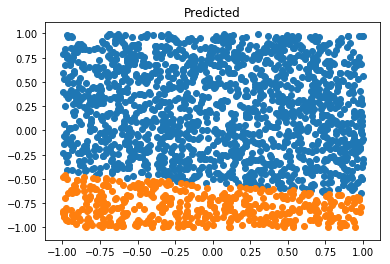

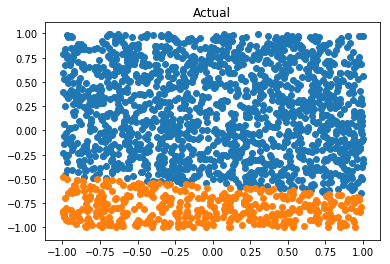

In [154]:
def sigmoid(X):
    return 1 / (1 + np.exp(-x))

class LogisticModel:
    
    def fit(self, X, y):
        eta = 0.01
        N = X.shape[0]
        w = np.zeros(X.shape[1])
        prev_w = np.ones(X.shape[1])
        epoch = 0
        
        while True:
            prev_w = w
            for n in np.random.permutation(N):
                n = np.random.randint(0, N)
                gradE = -y[n]*X[n,:] / (1 + np.exp(y[n] * w.dot(X[n,:])))
                w = w - eta * gradE

            
            epoch += 1
            if np.linalg.norm(w - prev_w) < 0.01:
                self.w = w
                break
                
        return epoch
            
    
    def predict(self, X):
        return np.sign(X @ self.w)
    
    def cross_entropy_error(self, X, y):
        N = X.shape[0]
        errs = []
        for n in range(N):
            errs.append(np.log(1 + np.exp(-y[n] * self.w.dot(X[n,:]))))
        return np.mean(errs)
    
num_epochs = []
cross_entropy_errors = []
        
for experiment in range(1, 100):
    
    b, a = random_line()
    X, y = generate_dataset(100, b, a)
    lm = LogisticModel()
    epochs = lm.fit(X, y)

    X_test, y_test = generate_dataset(2000, b, a)
    y_predicted = lm.predict(X_test)


    err = lm.cross_entropy_error(X_test, y_test)
    num_epochs.append(epochs)
    cross_entropy_errors.append(err)
    
    print("Epochs: ", np.mean(num_epochs))
    print("Error: ", np.mean(cross_entropy_errors))
    
    
ibelow = np.where(y_predicted==-1)
iabove = np.where(y_predicted==1)
plt.scatter(X_test[ibelow,1], X_test[ibelow,2])
plt.scatter(X_test[iabove,1], X_test[iabove,2])
plt.title("Predicted")
plt.show()

ibelow = np.where(y_test==-1)
iabove = np.where(y_test==1)
plt.scatter(X_test[ibelow,1], X_test[ibelow,2])
plt.scatter(X_test[iabove,1], X_test[iabove,2])
plt.title("Actual")
plt.show()

So around 330 epochs and 0.10 cross entropy error.

# 8

**Alternative D: 0.100**

# 9

**Alternative A: 350**

# 10

For PLA we have the update loop

$ w = w + y_n x_n $ for wrongly classified point ($y_n \neq w^T x_n$)

and

$ w = w $ for correctly classified point.


For SGD we have the update loop

$w = w - \eta \nabla e_n(w) $

Let $\eta=1$ for simplicity.

We have to pick $e_n$ so that $\nabla e_n \approx - y_n x_n $ for wrongly classified points and $\nabla e_n \approx 0 $ for correctly classified points.

**[a]**

Gradient is $- y_n x_n e^{-y_n w^T x_n}$

For correctly classified point we get $-y_n x_n \cdot \text{ small number } $
For wrongly classified point we $-y_n x_n \cdot \text{ large number }$

**[b]**

Gradient is $-y_n x_n $

This one is clearly wrong since it's the same for correct and wrong points.

**[c]**

Gradient is $-2(y_n - w^T x_n)x_n$

This one is also clearly wrong since it uses the difference between $y_n$ and $w^T x_n$ as a factor.

**[d]**

Gradient is

$$ \frac{-y_n x_n}{1 + e^{y_n w^T x_n}} $$

For correctly classified point we get $-y_n x_n \cdot \text{ small number }$

For wrongly classified point we get $ - y_n x_n  $

**[e]**

For correctly classified point we get gradient = 0.

For wrongly classified point we get $ -y_n x_n $

This is exactly the same as in the PLA algorithm.

So $-min(0, y_n w^T x_n)$ is the correct alternative. **Alternative E**

Alternative D is very tempting however.